https://drive.google.com/drive/folders/1vsAR2_rjRZkqNX4A52cWYbbxtwCDEKdt



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
pd.options.display.max_rows = 5
import warnings
warnings.filterwarnings("ignore")

In [3]:
pathh = 'datasets_qiang/'
london_files = ['UK_international-visits','london_underground_activity','london_underground_station_info']

Rio_files = ['brazil_tourism_jobs','brazil_international_arrivals']

vancouver_files = ['vancouver_turism_indicators','vancouver_employment_by_industry','vancouver_business_size',
                   'vancouver_small_business_by_region','vancouver_visits','vancouver_room_revenues_2000_2010',
                  'vancouver_room_revenues_2010_2019','region_codes']


### UK data
UK_international-visits： 2002-2019 --》tour的变化，但肯定和形式有关系，like脱欧之后tour数量肯定变少。但2012年tour应该增加很多。

可以：在奥运期间增加的visits

不可以：因为奥运 之后增加的tour，除非我能control什么 然后模拟出变化曲线

london_underground_activity：地铁人流量，07-17

london_underground_station_info：用来对应local region，对一下busy程度？要

control这些info来看人流量



In [4]:
#London datasets
for ind in range(len(london_files)):
    l1 = pd.read_csv('{0}london/{1}.csv'.format(pathh,london_files[ind]),encoding = "ISO-8859-1")
    display(london_files[ind])
    display(l1.head(3))

'UK_international-visits'

,year,quarter,market,dur_stay,mode,purpose,area,visits,spend,nights,sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,TOTAL ENGLAND,4.431616,1.013484,9.530416,6
1,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
2,2002,January-March,Belgium,1-3 nights,Air,Holiday,REST OF ENGLAND,0.859430,0.044346,2.575960,1


'london_underground_activity'

,year,nlc,station,area,weekday_entry,weekday_exit,saturday_entry,saturday_exit,sunday_entry,sunday_exit,annual_entry_and_exit
0,2007,500,Acton Town,Ealing,9205,8899.0,6722,6320,4427,4304,5.77
1,2007,502,Aldgate,City of London,9887,10397.0,2191,2587,1484,1772,5.57
2,2007,503,Aldgate East,Tower Hamlets,12820,12271.0,7040,6220,5505,5000,7.66


'london_underground_station_info'

,station,line,local_authority,zone,opened
0,Acton Town,District,Ealing,3,1879-07-01
1,Aldgate,Metropolitan[a],City of London,1,1876-11-18
2,Aldgate East,Hammersmith & City[d],Tower Hamlets,1,1884-10-06


In [5]:
ind = 0
l1 = pd.read_csv('{0}london/{1}.csv'.format(pathh,london_files[ind]),encoding = "ISO-8859-1")
print(len(l1))
l1.year[l1.year == '2018'] = 2018
l1.year[l1.year == '2019P'] = 2019


549853


In [6]:
l1.area.unique()

array(['TOTAL ENGLAND', 'LONDON', 'REST OF ENGLAND', 'SOUTHERN ENGLAND',
       'SOUTH EAST', 'SCOTLAND', 'ALL STAYING VISITS',
       "ENGLAND'S NORTH COUNTRY", 'CENTRAL ENGLAND', 'NORTH EAST',
       'NORTH WEST', 'WEST MIDLANDS', 'EAST MIDLANDS', 'EAST OF ENGLAND',
       'SOUTH WEST', 'YORKSHIRE', 'WALES', ' NORTHERN IRELAND',
       ' OIL RIGS/TRAVELLING', ' ISLE OF MAN', ' CHANNEL ISLANDS'],
      dtype=object)

In [7]:
l_new = pd.DataFrame(l1.groupby(['year','area','purpose']).agg(visits_sum = ('visits','sum'),
                               spend_sum = ('spend','sum'))).reset_index()

In [8]:
l_new

,year,area,purpose,visits_sum,spend_sum
0,2002,CHANNEL ISLANDS,Business,5.328673,2.006625
1,2002,CHANNEL ISLANDS,Holiday,10.152168,6.549984
...,...,...,...,...,...
1814,2019,YORKSHIRE,Study,14.488225,30.184436
1815,2019,YORKSHIRE,VFR,402.682284,143.855401


In [9]:
l_new.purpose.unique()


array(['Business', 'Holiday', 'Miscellaneous', 'VFR', 'Study'],
      dtype=object)

In [10]:
fig_size = (14,10)

Text(0.5, 1.0, 'Percentage change in sum of spending in England')

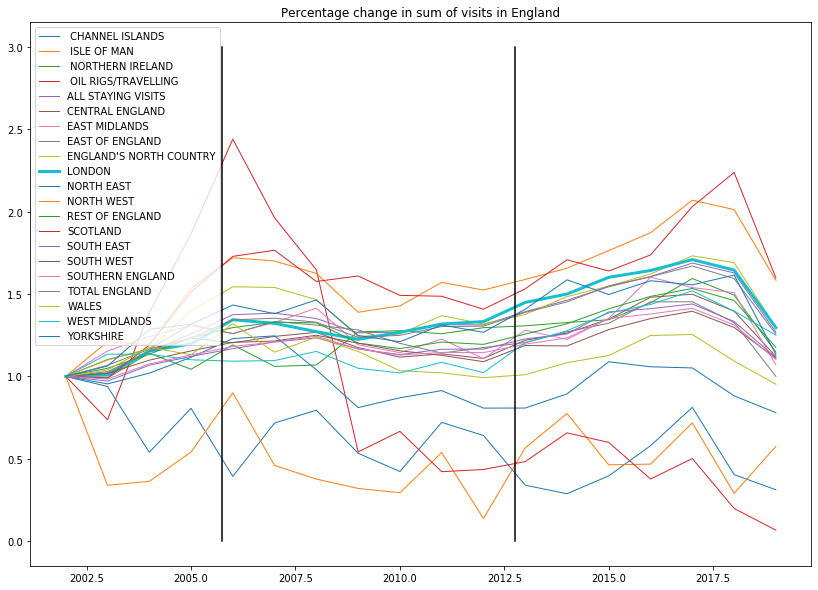

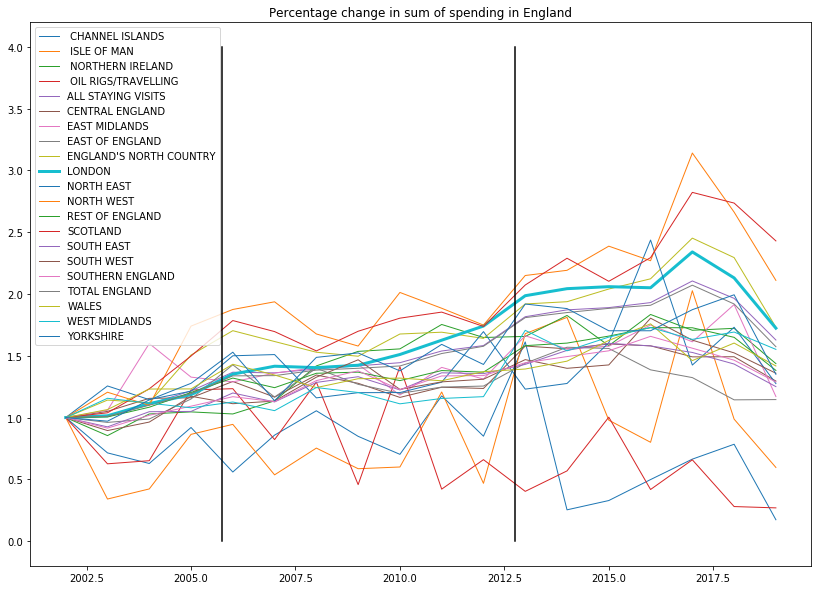

In [11]:
state_list = l_new.area.unique()
plt.figure(figsize = fig_size)
for a in state_list:
    sub = pd.DataFrame(l_new[(l_new.area == a)].groupby(['year']).agg(visits_sum = ('visits_sum','sum'),
                                                        spend_sum = ('spend_sum','sum'))).reset_index()
    pl = 1
    if a =='LONDON':
        pl = 3
    plt.plot(sub.year,sub.visits_sum/sub.visits_sum.iloc[0],linewidth = pl)
plt.legend(state_list)
plt.plot([2005.75,2005.75],[0,3],color = 'black')
plt.plot([2012.75,2012.75],[0,3],color = 'black')
plt.title('Percentage change in sum of visits in England')

state_list = l_new.area.unique()
plt.figure(figsize =fig_size)
for a in state_list:
    sub = pd.DataFrame(l_new[(l_new.area == a)].groupby(['year']).agg(visits_sum = ('visits_sum','sum'),
                                                        spend_sum = ('spend_sum','sum'))).reset_index()
    pl = 1
    if a =='LONDON':
        pl = 3
    plt.plot(sub.year,sub.spend_sum/sub.spend_sum.iloc[0],linewidth = pl)
plt.legend(state_list)
plt.plot([2005.75,2005.75],[0,4],color = 'black')
plt.plot([2012.75,2012.75],[0,4],color = 'black')
plt.title('Percentage change in sum of spending in England')

Text(0.5, 1.0, 'Percentage change in sum of spending in England')

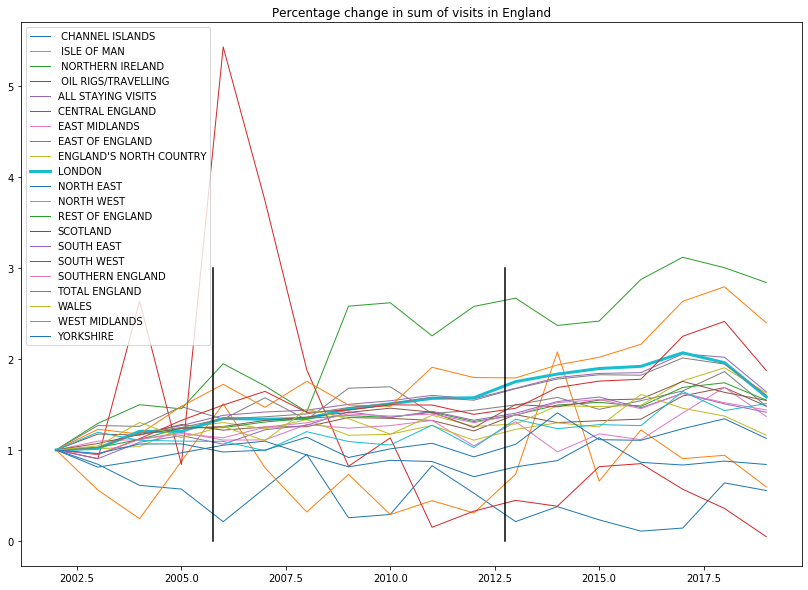

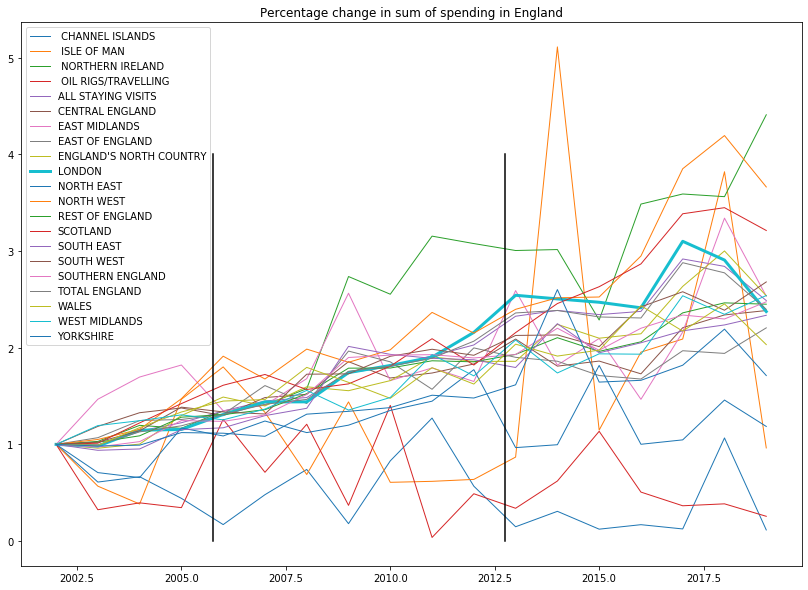

In [12]:
state_list = l_new.area.unique()
plt.figure(figsize = fig_size)
for a in state_list:
    sub = l_new[(l_new.area == a) &(l_new.purpose == 'Holiday')]
    pl = 1
    if a =='LONDON':
        pl = 3
    plt.plot(sub.year,sub.visits_sum/sub.visits_sum.iloc[0],linewidth = pl)
plt.legend(state_list)
plt.plot([2005.75,2005.75],[0,3],color = 'black')
plt.plot([2012.75,2012.75],[0,3],color = 'black')
plt.title('Percentage change in sum of visits in England')

state_list = l_new.area.unique()
plt.figure(figsize =fig_size)
for a in state_list:
    sub = l_new[(l_new.area == a) &(l_new.purpose == 'Holiday')]
    pl = 1
    if a =='LONDON':
        pl = 3
    plt.plot(sub.year,sub.spend_sum/sub.spend_sum.iloc[0],linewidth = pl)
plt.legend(state_list)
plt.plot([2005.75,2005.75],[0,4],color = 'black')
plt.plot([2012.75,2012.75],[0,4],color = 'black')
plt.title('Percentage change in sum of spending in England')

Text(0.5, 1.0, 'Visits_sum')

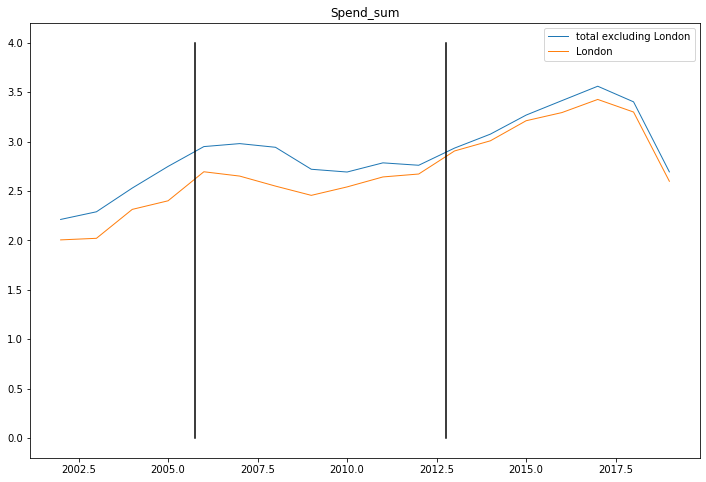

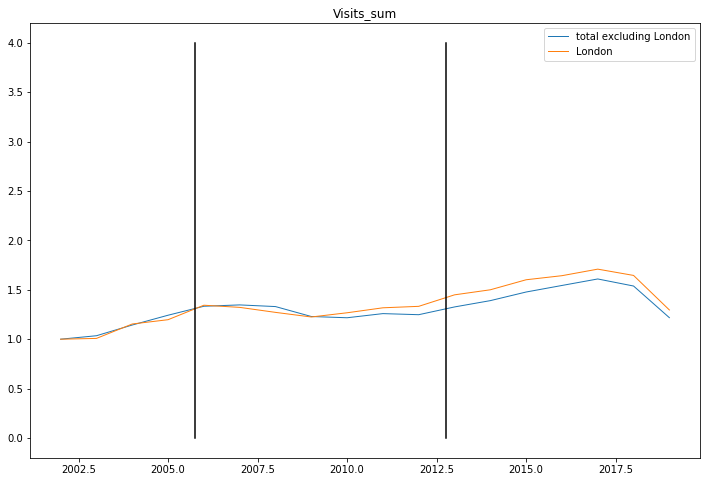

In [13]:
plt.figure(figsize = (12,8))
sub = pd.DataFrame(l_new[l_new.area != 'LONDON'].groupby(['year']).agg(visits_sum = ('visits_sum','sum'),
                                                        spend_sum = ('spend_sum','sum'))).reset_index()

plt.plot(sub.year,sub.visits_sum/sub.spend_sum.iloc[0],linewidth = 1)

sub = pd.DataFrame(l_new[l_new.area == 'LONDON'].groupby(['year']).agg(visits_sum = ('visits_sum','sum'),
                                                        spend_sum = ('spend_sum','sum'))).reset_index()

plt.plot(sub.year,sub.visits_sum/sub.spend_sum.iloc[0],linewidth = 1)

plt.legend(['total excluding London','London'])
plt.plot([2005.75,2005.75],[0,4],color = 'black')
plt.plot([2012.75,2012.75],[0,4],color = 'black')

plt.title('Spend_sum')

plt.figure(figsize = (12,8))
sub = pd.DataFrame(l_new[l_new.area != 'LONDON'].groupby(['year']).agg(visits_sum = ('visits_sum','sum'),
                                                        spend_sum = ('spend_sum','sum'))).reset_index()

plt.plot(sub.year,sub.visits_sum/sub.visits_sum.iloc[0],linewidth = 1)

sub = pd.DataFrame(l_new[l_new.area == 'LONDON'].groupby(['year']).agg(visits_sum = ('visits_sum','sum'),
                                                        spend_sum = ('spend_sum','sum'))).reset_index()

plt.plot(sub.year,sub.visits_sum/sub.visits_sum.iloc[0],linewidth = 1)

plt.legend(['total excluding London','London'])
plt.plot([2005.75,2005.75],[0,4],color = 'black')
plt.plot([2012.75,2012.75],[0,4],color = 'black')

plt.title('Visits_sum')

### Rio data

brazil_tourism_jobs：和旅游相关的职业数量 region 变化（注意有可能有移动）需要个翻译的package～

brazil_international_arrivals：和london比这个不分tour type，但应该比survey的准确。。。 可能可以看出来奥运吸的tour都是哪个国家？
maybe study what's specific about the tour attracted by olympics? and 钱都花在哪里，会有多久的影响







In [14]:
#Rio datasets
for ind in range(len(Rio_files)):
    l2 = pd.read_csv('{0}Rio/{1}.csv'.format(pathh,Rio_files[ind]))
    print(ind,Rio_files[ind])
    display(l2.head(3))

0 brazil_tourism_jobs


,year,month,region,state,job_type,jobs
0,2006,1,Centro-Oeste,Distrito Federal,Alojamento,2647
1,2006,1,Centro-Oeste,Distrito Federal,Alimentação,5026
2,2006,1,Centro-Oeste,Distrito Federal,Transporte Terrestre,5400


1 brazil_international_arrivals


,year,month,country,value
0,1989,1,África do Sul,764
1,1989,1,Alemanha,"7,214"
2,1989,1,Angola,433


In [15]:
riov = pd.read_csv('{0}Rio/{1}.csv'.format(pathh,Rio_files[1]))
riov =    riov[riov.year>=2005]

In [16]:
riov.value = [float(str(a).replace(',','')) for a in riov.value ]
Vancouver_visits = pd.DataFrame(riov.groupby(['year','month'])['value'].sum()).reset_index()
Vancouver_visits['time_in_order'] = Vancouver_visits['year'] + pd.Series([a/13 for a in Vancouver_visits['month']])


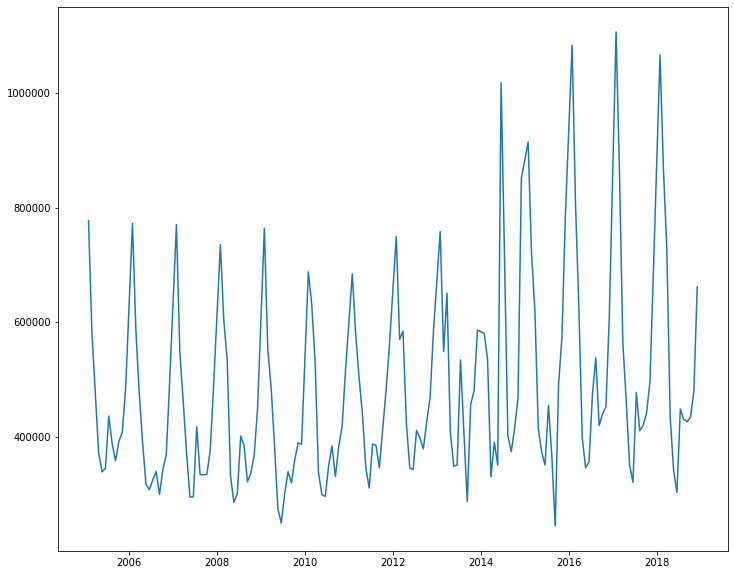

In [17]:
plt.figure(figsize = (12,10))
plt.plot(Vancouver_visits.time_in_order,Vancouver_visits.value)

In [18]:
year_mean = pd.DataFrame(Vancouver_visits.groupby('year')['value'].mean()).reset_index()
Vancouver_visits2 = Vancouver_visits.merge(year_mean,how = 'left',left_on = 'year',right_on = 'year')
s1994_set = Vancouver_visits2[(Vancouver_visits2.year == 2005)][['month','value_x']]
Vancouver_visits2 = Vancouver_visits2.merge(s1994_set,how = 'left',left_on = 'month',right_on = 'month')
Vancouver_visits2 = Vancouver_visits2.rename(columns = {'value_x_x':'value','value_y':'year_mean','value_x_y':'value1994'})
Vancouver_visits2['perc'] = Vancouver_visits2['value'] / Vancouver_visits2['value1994']



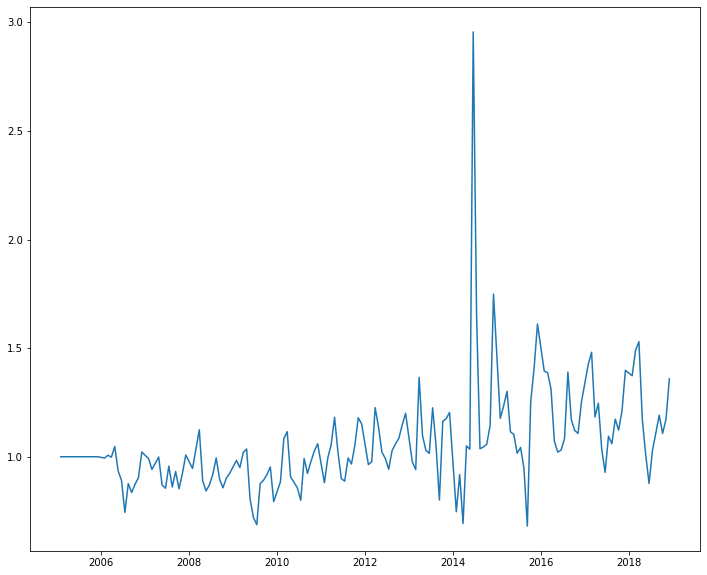

In [19]:
plt.figure(figsize = (12,10))
plt.plot(Vancouver_visits2.time_in_order,Vancouver_visits2.perc)

In [20]:
Vancouver_visits3 = Vancouver_visits2.copy()
Vancouver_visits3 = Vancouver_visits3[(Vancouver_visits3.year>=1996)&(Vancouver_visits3.year<2018)]
Vancouver_visits4 = pd.DataFrame()
for i in np.arange(1,13):
    sub = Vancouver_visits3[Vancouver_visits3.month == i]
    sub['prev_val'] = np.NaN
    sub['prev_val'][1:] =  sub['value'][:-1].tolist()
    Vancouver_visits4 = pd.concat([Vancouver_visits4,sub])
    
Vancouver_visits4 = Vancouver_visits4[Vancouver_visits4.year != 1996]
Vancouver_visits4['prec_increase'] = Vancouver_visits4['value']  / Vancouver_visits4['prev_val'] 

Vancouver_visits4 = Vancouver_visits4.sort_values('time_in_order')


Text(0.5, 1.0, 'Percentage increase in Visits in brazil, compared to the same month in 2005')

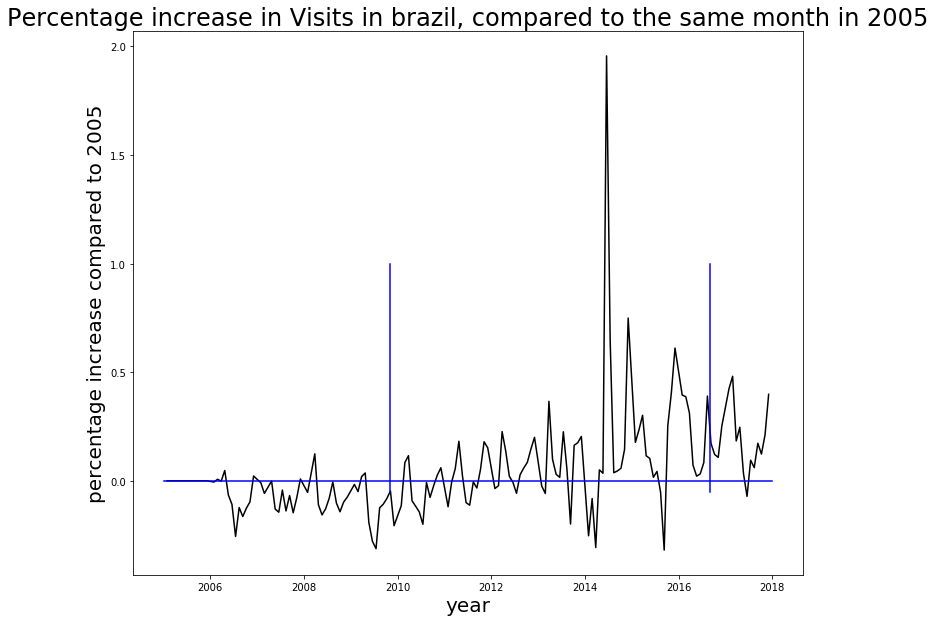

In [21]:
plt.figure(figsize = (12,10))
plt.plot(Vancouver_visits4.time_in_order,Vancouver_visits4.perc -1,color = 'black')

plt.plot([2009+10/12,2009+10/12],[-.05,1],color = 'blue')
plt.plot([2016+8/12,2016+8/12],[-.05,1],color = 'blue')
plt.plot([2005,2018],[0,0],color = 'blue')

plt.xlabel('year',fontsize = 20)
plt.ylabel('percentage increase compared to 2005',fontsize = 20)
plt.title('Percentage increase in Visits in brazil, compared to the same month in 2005',fontsize = 24)



Text(0.5, 1.0, 'Percentage increase in Visits in Brazil, compared to the same month in previous year')

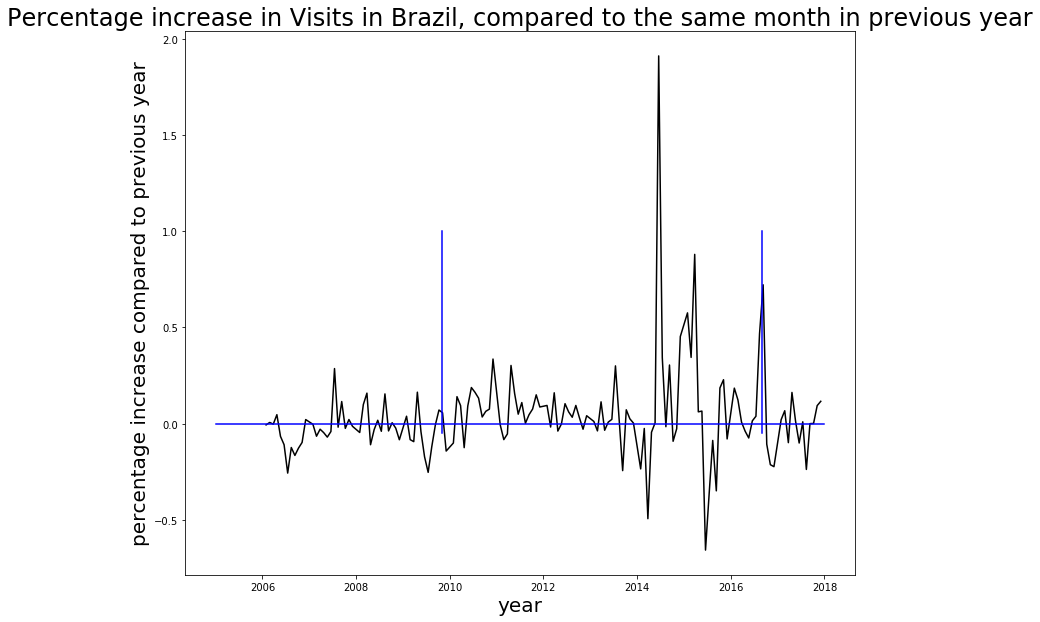

In [22]:
plt.figure(figsize = (12,10))
plt.plot(Vancouver_visits4.time_in_order,Vancouver_visits4.prec_increase -1,color = 'black')

plt.plot([2009+10/12,2009+10/12],[-.05,1],color = 'blue')
plt.plot([2016+8/12,2016+8/12],[-.05,1],color = 'blue')
plt.plot([2005,2018],[0,0],color = 'blue')

plt.xlabel('year',fontsize = 20)
plt.ylabel('percentage increase compared to previous year',fontsize = 20)
plt.title('Percentage increase in Visits in Brazil, compared to the same month in previous year',fontsize = 24)



In [23]:
l1 = pd.read_csv('{0}Rio/{1}.csv'.format(pathh,Rio_files[0]))
job_list_brazil = l1.job_type.unique()
job_list_English = ['Accommodation', 'Food', 'Ground transportation',
       'Water transport', 'Air transport',
       'Transport Rent', 'Travel Agency', 'Culture and Leisure']
for job,job2 in zip(job_list_brazil,job_list_English):
    l1['job_type'][ l1['job_type'] == job] = job2

In [24]:
l1.groupby(['region','state'])['jobs'].sum()

region        state            
Centro-Oeste  Distrito Federal     3254378
              Goiás                3299198
                                    ...   
Sul           Rio Grande do Sul    7031301
              Santa Catarina       5000762
Name: jobs, Length: 27, dtype: int64

In [25]:
l1_1 = pd.DataFrame(l1.groupby(['year','month','region','state'])['jobs'].sum()).reset_index()
l1_1['rio'] = ['rio_region' if a == 'Sudeste' else 'other' for a in l1_1.region]
l1_1['rio'][l1_1.state == 'Rio de Janeiro'] = 'Rio'

In [26]:
l1_1

,year,month,region,state,jobs,rio
0,2006,1,Centro-Oeste,Distrito Federal,15853,other
1,2006,1,Centro-Oeste,Goiás,16518,other
...,...,...,...,...,...,...
4210,2018,12,Sul,Rio Grande do Sul,54585,other
4211,2018,12,Sul,Santa Catarina,42663,other


Text(0.5, 1.0, 'Percentage increase in tourism related jobs in Rio Region, compared to the same month in 2000')

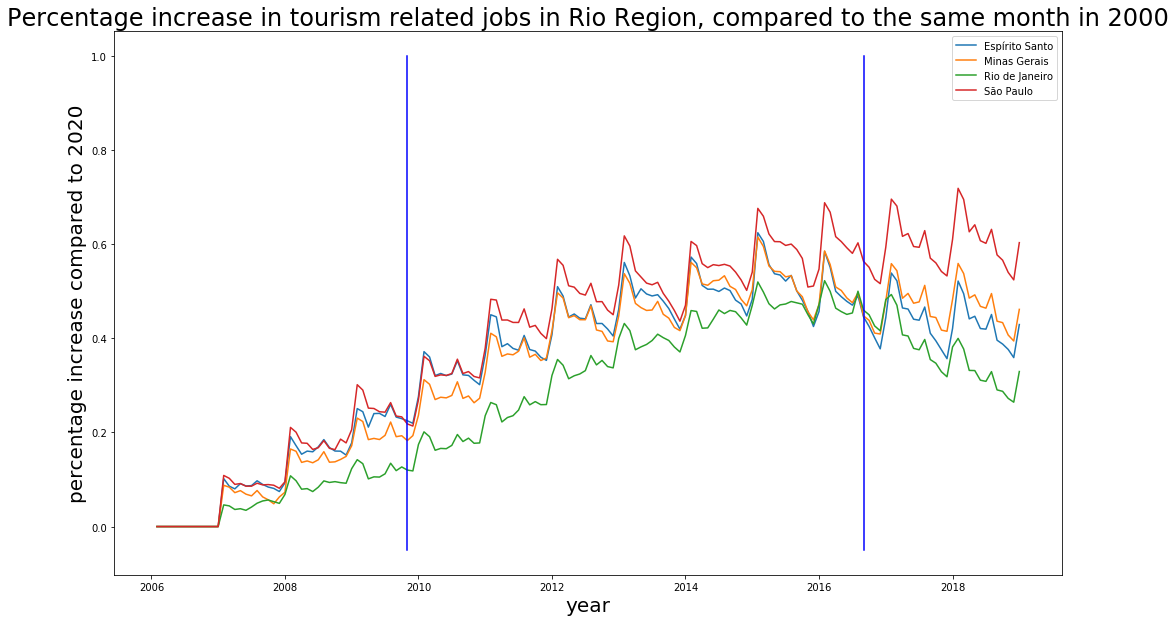

In [27]:
vrv_2018 = l1_1
vrv_2018['values'] = vrv_2018['jobs']
vrv_2018['region_code'] = vrv_2018['state']

valid_regions =vrv_2018[vrv_2018.rio != 'other']['state'].unique()
valid_name = valid_regions

plt.figure(figsize = (17,10))
for codes in valid_regions:
    vrv_part = vrv_2018[vrv_2018.region_code == codes]

    vrv_part = pd.DataFrame(vrv_part.groupby(['year','month'])['jobs'].sum()).reset_index()
    vrv_part['time_in_order'] = (vrv_part['year'].reset_index(drop = True) + pd.Series([a/12 for a in vrv_part['month']])).tolist()
    
    vrv_van = pd.DataFrame()
    vrv_van_pre = vrv_part
    for m in vrv_van_pre.month.unique():
        sub = vrv_van_pre[vrv_van_pre.month == m]
        sub['prev_val'] = sub['jobs'].iloc[0]
        vrv_van = pd.concat([vrv_van,sub])
    vrv_van['prec_increase'] = vrv_van['jobs'] / vrv_van['prev_val']
    vrv_van = vrv_van.sort_values('time_in_order')

    if codes == 'RD15':
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1,linewidth = 3,color = 'black')
    else:
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1)


    
plt.legend(valid_name)
plt.plot([2009+10/12,2009+10/12],[-.05,1],color = 'blue')
plt.plot([2016+8/12,2016+8/12],[-.05,1],color = 'blue')
#plt.plot([2006,2018],[0,0],color = 'blue')
   
plt.xlabel('year',fontsize = 20)
plt.ylabel('percentage increase compared to 2020',fontsize = 20)
plt.title('Percentage increase in tourism related jobs in Rio Region, compared to the same month in 2000',fontsize = 24)




Text(0.5, 1.0, 'Percentage increase in tourism related jobs in Rio Region, compared to the same month in previous year')

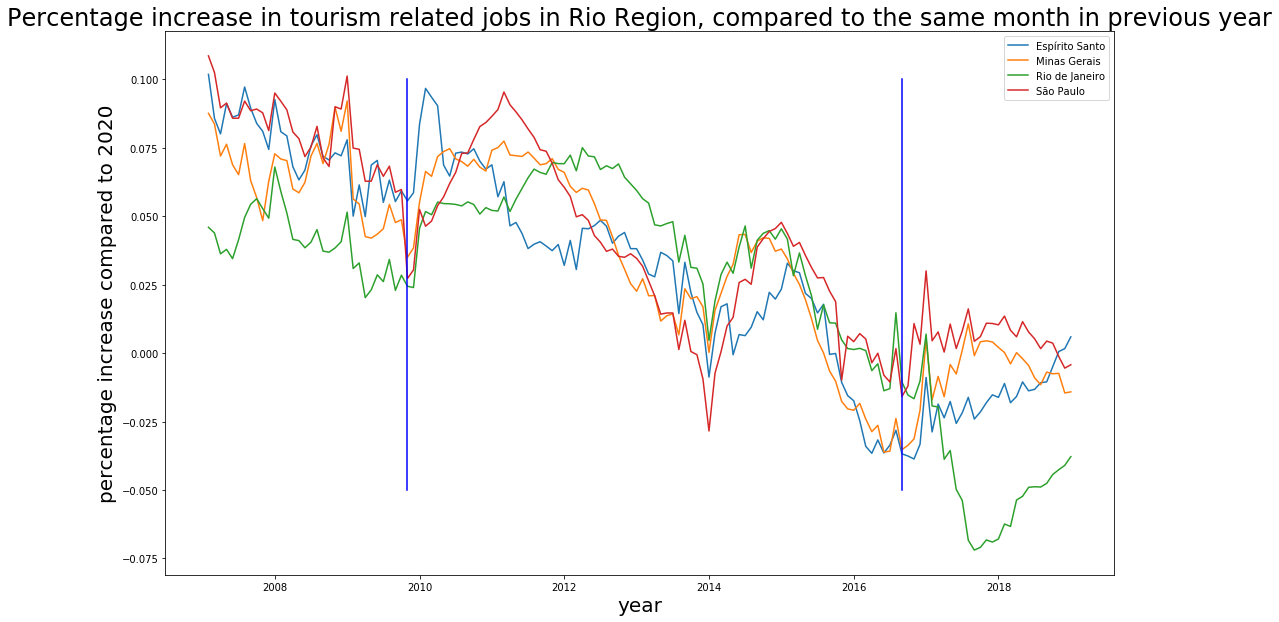

In [28]:
vrv_2018 = l1_1
vrv_2018['values'] = vrv_2018['jobs']
vrv_2018['region_code'] = vrv_2018['state']

valid_regions =vrv_2018[vrv_2018.rio != 'other']['state'].unique()
valid_name = valid_regions

plt.figure(figsize = (17,10))
for codes in valid_regions:
    vrv_part = vrv_2018[vrv_2018.region_code == codes]

    vrv_part = pd.DataFrame(vrv_part.groupby(['year','month'])['jobs'].sum()).reset_index()
    vrv_part['time_in_order'] = (vrv_part['year'].reset_index(drop = True) + pd.Series([a/12 for a in vrv_part['month']])).tolist()
    
    vrv_van = pd.DataFrame()
    vrv_van_pre = vrv_part
    for m in vrv_van_pre.month.unique():
        sub = vrv_van_pre[vrv_van_pre.month == m]
        sub['prev_val'] = np.NaN
        sub['prev_val'][1:] =  sub['jobs'][:-1].tolist()
        vrv_van = pd.concat([vrv_van,sub])
    vrv_van['prec_increase'] = vrv_van['jobs'] / vrv_van['prev_val']
    vrv_van = vrv_van.sort_values('time_in_order')

    if codes == 'RD15':
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1,linewidth = 3,color = 'black')
    else:
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1)


    
plt.legend(valid_name)
plt.plot([2009+10/12,2009+10/12],[-.05,.1],color = 'blue')
plt.plot([2016+8/12,2016+8/12],[-.05,.1],color = 'blue')
#plt.plot([2006,2018],[0,0],color = 'blue')
   
plt.xlabel('year',fontsize = 20)
plt.ylabel('percentage increase compared to 2020',fontsize = 20)
plt.title('Percentage increase in tourism related jobs in Rio Region, compared to the same month in previous year',fontsize = 24)




Text(0.5, 1.0, 'Average increase in tourism related jobs in Brazil, compared to 2006')

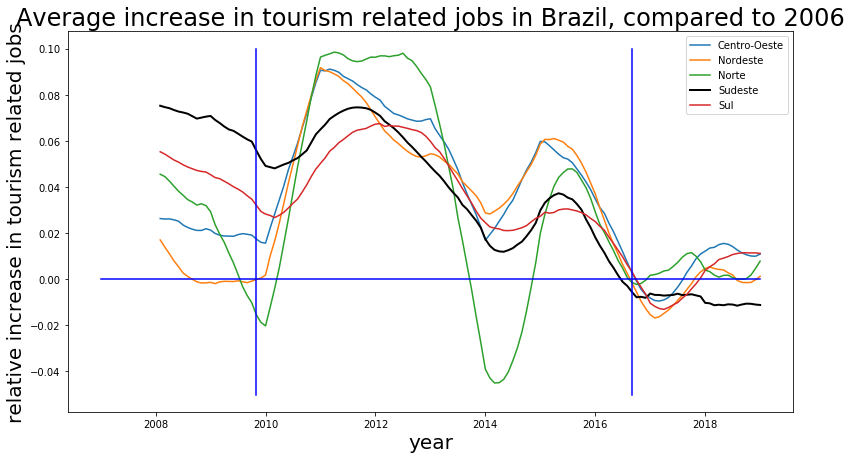

In [29]:
vrv_2018 = l1_1
vrv_2018['values'] = vrv_2018['jobs']
vrv_2018['region_code'] = vrv_2018['region']

#valid_regions =vrv_2018[vrv_2018.rio != 'other']['state'].unique()
valid_regions =vrv_2018['region'].unique()

valid_name = valid_regions

plt.figure(figsize = (13,7))
for codes in valid_regions:
    vrv_part = vrv_2018[vrv_2018.region_code == codes]

    vrv_part = pd.DataFrame(vrv_part.groupby(['year','month'])['jobs'].sum()).reset_index()
    vrv_part['time_in_order'] = (vrv_part['year'].reset_index(drop = True) + pd.Series([a/12 for a in vrv_part['month']])).tolist()
        
    
    wind = 12
    vrv_van_pre = vrv_part
    vrv_van_pre['rolling_jobs'] = vrv_van_pre['jobs'].rolling(wind).mean().to_list()
    vrv_van_pre = vrv_van_pre.iloc[(wind):]
    
    
    vrv_van = pd.DataFrame()
    for m in vrv_van_pre.month.unique():
        sub = vrv_van_pre[vrv_van_pre.month == m]
        sub['prev_val'] = np.NaN
        sub['prev_val'][1:] =  sub['rolling_jobs'][:-1].tolist()
        vrv_van = pd.concat([vrv_van,sub])
    vrv_van['prec_increase'] = vrv_van['rolling_jobs'] / vrv_van['prev_val']
    vrv_van = vrv_van.sort_values('time_in_order')
  
    
    
    if codes == 'Sudeste':
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1,linewidth = 2,color = 'black')
    else:
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1)


    
plt.legend(valid_name)
plt.plot([2009+10/12,2009+10/12],[-.05,.1],color = 'blue')
plt.plot([2016+8/12,2016+8/12],[-.05,.1],color = 'blue')
plt.plot([2007,2019],[0,0],color = 'blue')
   
plt.xlabel('year',fontsize = 20)
plt.ylabel('relative increase in tourism related jobs',fontsize = 20)
plt.title('Average increase in tourism related jobs in Brazil, compared to 2006',fontsize = 24)




Text(0.5, 1.0, 'Percentage increase in tourism related jobs in Brazil, compared to the same month in 2000')

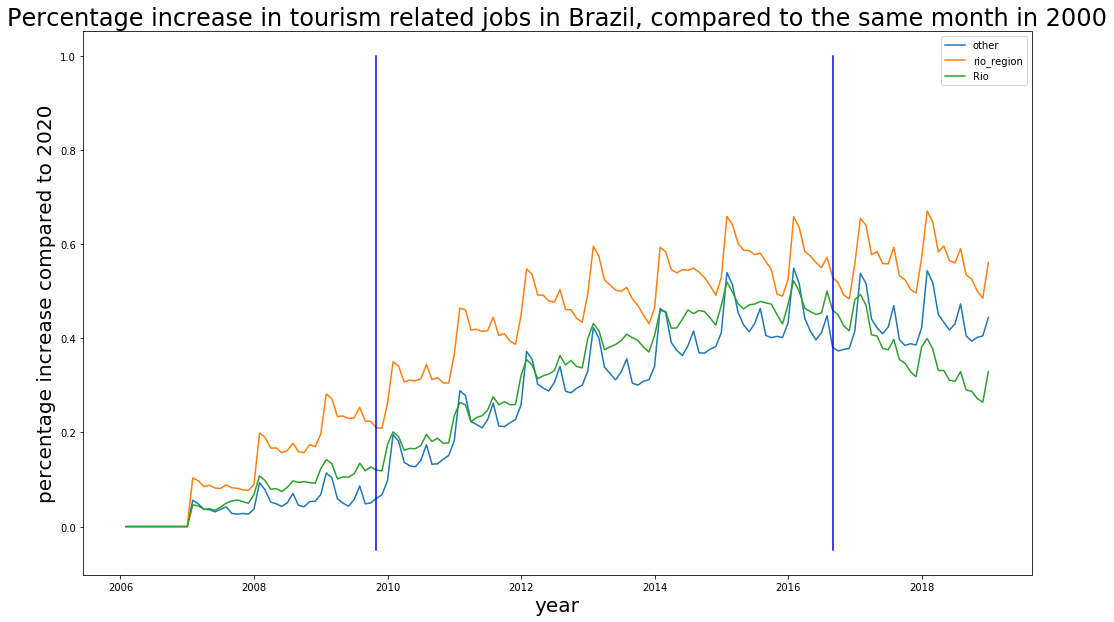

In [30]:
vrv_2018 = l1_1
vrv_2018['values'] = vrv_2018['jobs']
vrv_2018['region_code'] = vrv_2018['rio']

valid_regions =vrv_2018['rio'].unique()
valid_name = valid_regions

plt.figure(figsize = (17,10))
for codes in valid_regions:
    vrv_part = vrv_2018[vrv_2018.region_code == codes]

    vrv_part = pd.DataFrame(vrv_part.groupby(['year','month'])['jobs'].sum()).reset_index()
    vrv_part['time_in_order'] = (vrv_part['year'].reset_index(drop = True) + pd.Series([a/12 for a in vrv_part['month']])).tolist()
    
    vrv_van = pd.DataFrame()
    vrv_van_pre = vrv_part
    for m in vrv_van_pre.month.unique():
        sub = vrv_van_pre[vrv_van_pre.month == m]
        sub['prev_val'] = sub['jobs'].iloc[0]
        vrv_van = pd.concat([vrv_van,sub])
    vrv_van['prec_increase'] = vrv_van['jobs'] / vrv_van['prev_val']
    vrv_van = vrv_van.sort_values('time_in_order')

    if codes == 'RD15':
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1,linewidth = 3,color = 'black')
    else:
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1)


    
plt.legend(valid_name)
plt.plot([2009+10/12,2009+10/12],[-.05,1],color = 'blue')
plt.plot([2016+8/12,2016+8/12],[-.05,1],color = 'blue')
#plt.plot([2006,2018],[0,0],color = 'blue')
   
plt.xlabel('year',fontsize = 20)
plt.ylabel('percentage increase compared to 2020',fontsize = 20)
plt.title('Percentage increase in tourism related jobs in Brazil, compared to the same month in 2000',fontsize = 24)




In [31]:
vrv_2018 = l1_1
vrv_2018['values'] = vrv_2018['jobs']
vrv_2018['region_code'] = vrv_2018['rio']

valid_regions =vrv_2018['rio'].unique()
valid_name = valid_regions

plt.figure(figsize = (17,10))
for codes in valid_regions[:1]:
    vrv_part = vrv_2018[vrv_2018.region_code == codes]

    vrv_part = pd.DataFrame(vrv_part.groupby(['year','month'])['jobs'].sum()).reset_index()
    vrv_part['time_in_order'] = (vrv_part['year'].reset_index(drop = True) + pd.Series([a/12 for a in vrv_part['month']])).tolist()
    
    vrv_van = pd.DataFrame()
    vrv_van_pre = vrv_part
    vrv_van_pre['rolling_jobs'] = vrv_part['jobs'].rolling(12).mean().to_list()[5:] + [np.NaN]*5

<Figure size 1224x720 with 0 Axes>

In [32]:
vrv_van

""


Text(0.5, 1.0, 'Percentage increase in tourism related jobs in Brazil, compared to the same month in 2000')

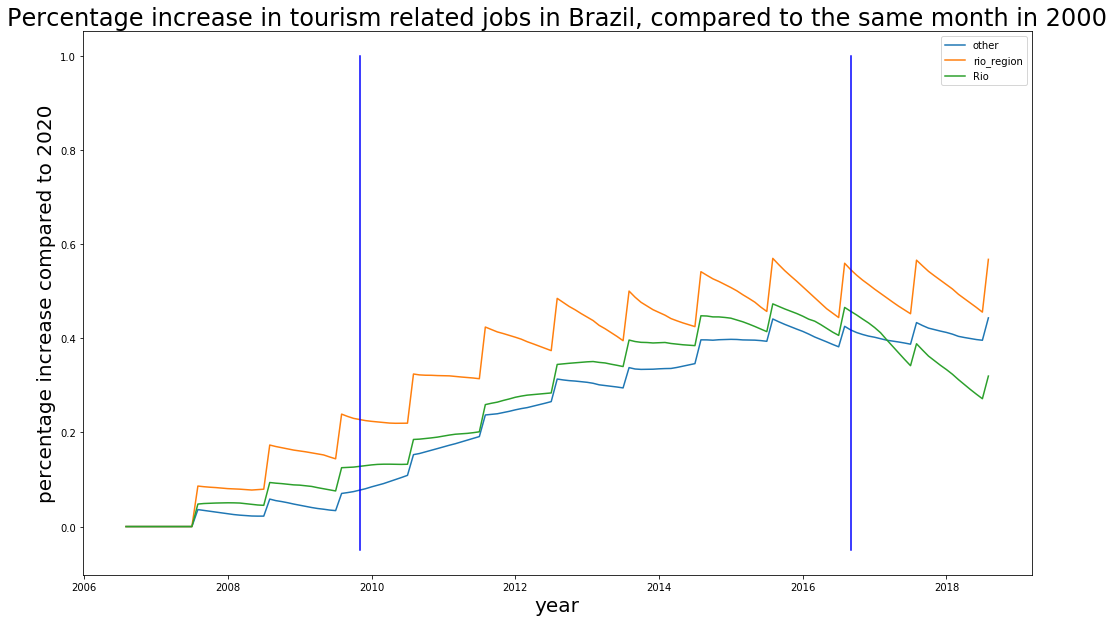

In [33]:
vrv_2018 = l1_1
vrv_2018['values'] = vrv_2018['jobs']
vrv_2018['region_code'] = vrv_2018['rio']

valid_regions =vrv_2018['rio'].unique()
valid_name = valid_regions

plt.figure(figsize = (17,10))
for codes in valid_regions:
    vrv_part = vrv_2018[vrv_2018.region_code == codes]

    vrv_part = pd.DataFrame(vrv_part.groupby(['year','month'])['jobs'].sum()).reset_index()
    vrv_part['time_in_order'] = (vrv_part['year'].reset_index(drop = True) + pd.Series([a/12 for a in vrv_part['month']])).tolist()
    wind = 12
    vrv_van = pd.DataFrame()
    vrv_van_pre = vrv_part
    vrv_van_pre['rolling_jobs'] = vrv_van_pre['jobs'].rolling(wind).mean().to_list()[(wind//2-1):] + [np.NaN]*(wind//2-1)
    vrv_van_pre = vrv_van_pre.iloc[(wind//2):-(wind//2-1)]
    
    for m in vrv_van_pre.month.unique():
        sub = vrv_van_pre[vrv_van_pre.month == m]
        sub['prev_val'] = sub['rolling_jobs'].iloc[0]
        vrv_van = pd.concat([vrv_van,sub])
    vrv_van['prec_increase'] = vrv_van['rolling_jobs'] / vrv_van['prev_val']
    vrv_van = vrv_van.sort_values('time_in_order')

    if codes == 'RD15':
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1,linewidth = 3,color = 'black')
    else:
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1)




    
plt.legend(valid_name)
plt.plot([2009+10/12,2009+10/12],[-.05,1],color = 'blue')
plt.plot([2016+8/12,2016+8/12],[-.05,1],color = 'blue')
#plt.plot([2006,2018],[0,0],color = 'blue')
   
plt.xlabel('year',fontsize = 20)
plt.ylabel('percentage increase compared to 2020',fontsize = 20)
plt.title('Percentage increase in tourism related jobs in Brazil, compared to the same month in 2000',fontsize = 24)




In [34]:
vrv_part

,year,month,jobs,time_in_order,rolling_jobs
0,2006,1,95386,2006.083333,NaN
1,2006,2,94616,2006.166667,NaN
...,...,...,...,...,...
154,2018,11,120500,2018.916667,NaN
155,2018,12,135848,2019.000000,NaN


Text(0.5, 1.0, 'Yearly Percentage increase in tourism related jobs in Brazil, compared to 2006')

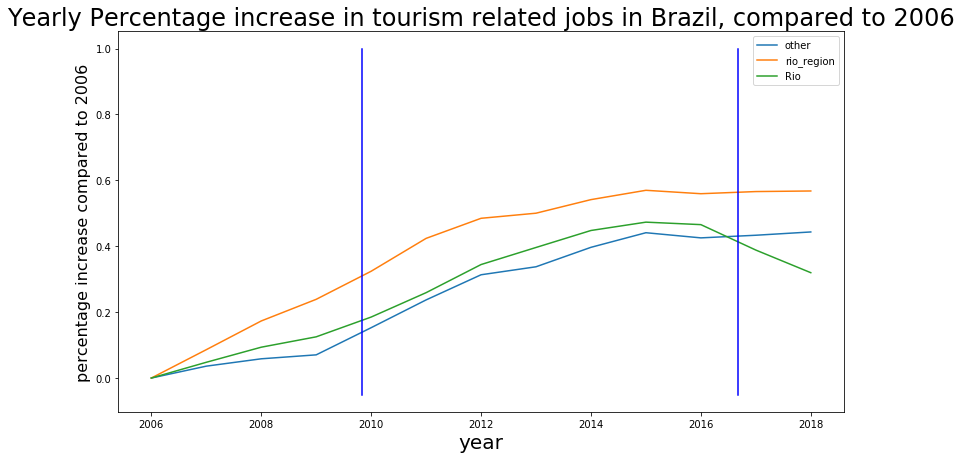

In [35]:
vrv_2018 = l1_1
vrv_2018['values'] = vrv_2018['jobs']
vrv_2018['region_code'] = vrv_2018['rio']

valid_regions =vrv_2018['rio'].unique()
valid_name = valid_regions

plt.figure(figsize = (13,7))
for codes in valid_regions:
    vrv_part = vrv_2018[vrv_2018.region_code == codes]

    vrv_part = pd.DataFrame(vrv_part.groupby(['year'])['jobs'].sum()).reset_index()
 
    vrv_part['prev_val'] = vrv_part['jobs'].iloc[0]

    vrv_part['prec_increase'] = vrv_part['jobs'] / vrv_part['prev_val']
    vrv_van = vrv_van.sort_values('time_in_order')

    if codes == 'RD15':
        plt.plot(vrv_part.year,vrv_part.prec_increase-1,linewidth = 3,color = 'black')
    else:
        plt.plot(vrv_part.year,vrv_part.prec_increase-1)




    
plt.legend(valid_name)
plt.plot([2009+10/12,2009+10/12],[-.05,1],color = 'blue')
plt.plot([2016+8/12,2016+8/12],[-.05,1],color = 'blue')
#plt.plot([2006,2018],[0,0],color = 'blue')
   
plt.xlabel('year',fontsize = 20)
plt.ylabel('percentage increase compared to 2006',fontsize = 16)
plt.title('Yearly Percentage increase in tourism related jobs in Brazil, compared to 2006',fontsize = 24)



In [36]:
l1_1

,year,month,region,state,jobs,rio,values,region_code
0,2006,1,Centro-Oeste,Distrito Federal,15853,other,15853,other
1,2006,1,Centro-Oeste,Goiás,16518,other,16518,other
...,...,...,...,...,...,...,...,...
4210,2018,12,Sul,Rio Grande do Sul,54585,other,54585,other
4211,2018,12,Sul,Santa Catarina,42663,other,42663,other


Text(0.5, 1.0, 'Average increase in tourism related jobs in Brazil, compared to the previous year')

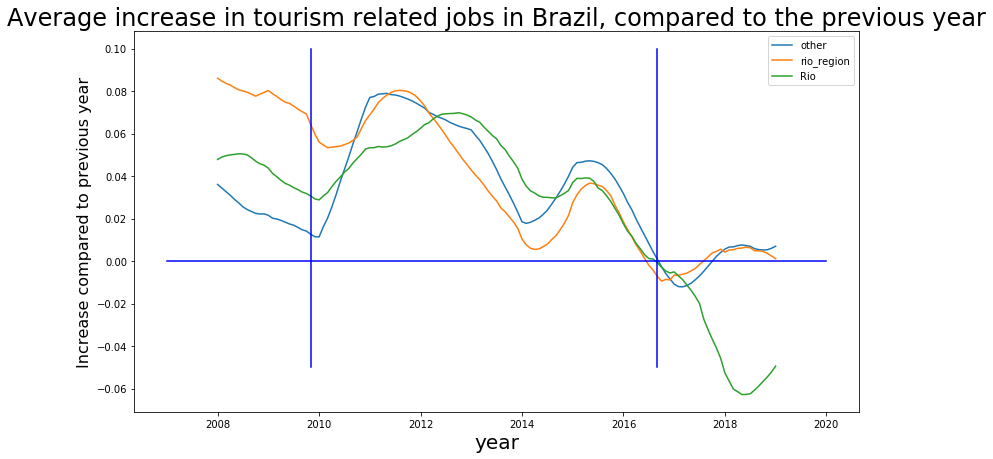

In [37]:
vrv_2018 = l1_1
vrv_2018['values'] = vrv_2018['jobs']
vrv_2018['region_code'] = vrv_2018['rio']

valid_regions =vrv_2018['rio'].unique()

valid_name = valid_regions

plt.figure(figsize = (13,7))
for codes in valid_regions:
    vrv_part = vrv_2018[vrv_2018.region_code == codes]

    vrv_part = pd.DataFrame(vrv_part.groupby(['year','month'])['jobs'].sum()).reset_index()
    vrv_part['time_in_order'] = (vrv_part['year'].reset_index(drop = True) + pd.Series([a/12 for a in vrv_part['month']])).tolist()
    
    vrv_van = pd.DataFrame()
    vrv_van_pre = vrv_part
    vrv_van_pre['rolling_jobs'] = vrv_van_pre['jobs'].rolling(12).mean().to_list()
    vrv_van_pre = vrv_van_pre.iloc[11:]
    
    
    for m in vrv_van_pre.month.unique():
        sub = vrv_van_pre[vrv_van_pre.month == m]
        sub['prev_val'] = np.NaN
        sub['prev_val'][1:] =  sub['rolling_jobs'][:-1].tolist()
        vrv_van = pd.concat([vrv_van,sub])
    vrv_van['prec_increase'] = vrv_van['rolling_jobs'] / vrv_van['prev_val']
    vrv_van = vrv_van.sort_values('time_in_order')

    if codes == 'RD15':
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1,linewidth = 3,color = 'black')
    else:
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1)

    
  

    
plt.legend(valid_name)
plt.plot([2009+10/12,2009+10/12],[-.05,.1],color = 'blue')
plt.plot([2016+8/12,2016+8/12],[-.05,.1],color = 'blue')
plt.plot([2007,2020],[0,0],color = 'blue')
   
plt.xlabel('year',fontsize = 20)
plt.ylabel('Increase compared to previous year',fontsize = 16)
plt.title('Average increase in tourism related jobs in Brazil, compared to the previous year',fontsize = 24)




Text(0.5, 1.0, 'Percentage increase in tourism related jobs in Brazil, compared to the same month in 2006')

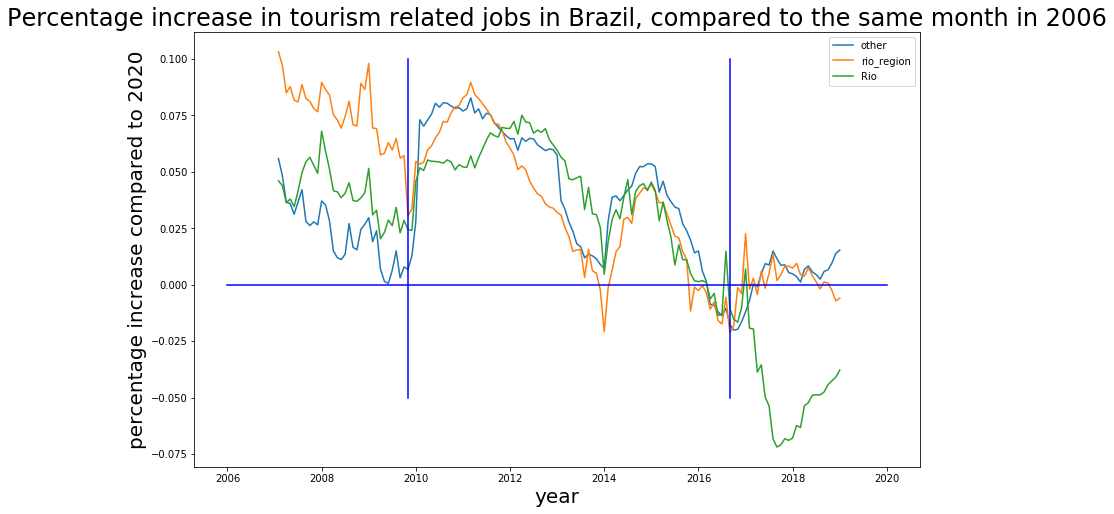

In [38]:
vrv_2018 = l1_1
vrv_2018['values'] = vrv_2018['jobs']
vrv_2018['region_code'] = vrv_2018['rio']

valid_regions =vrv_2018['rio'].unique()

valid_name = valid_regions

plt.figure(figsize = (13,8))
for codes in valid_regions:
    vrv_part = vrv_2018[vrv_2018.region_code == codes]

    vrv_part = pd.DataFrame(vrv_part.groupby(['year','month'])['jobs'].sum()).reset_index()
    vrv_part['time_in_order'] = (vrv_part['year'].reset_index(drop = True) + pd.Series([a/12 for a in vrv_part['month']])).tolist()
    
    vrv_van = pd.DataFrame()
    vrv_van_pre = vrv_part
    for m in vrv_van_pre.month.unique():
        sub = vrv_van_pre[vrv_van_pre.month == m]
        sub['prev_val'] = np.NaN
        sub['prev_val'][1:] =  sub['jobs'][:-1].tolist()
        vrv_van = pd.concat([vrv_van,sub])
    vrv_van['prec_increase'] = vrv_van['jobs'] / vrv_van['prev_val']
    vrv_van = vrv_van.sort_values('time_in_order')

    if codes == 'RD15':
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1,linewidth = 3,color = 'black')
    else:
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1)


    
plt.legend(valid_name)
plt.plot([2009+10/12,2009+10/12],[-.05,.1],color = 'blue')
plt.plot([2016+8/12,2016+8/12],[-.05,.1],color = 'blue')
plt.plot([2006,2020],[0,0],color = 'blue')
   
plt.xlabel('year',fontsize = 20)
plt.ylabel('percentage increase compared to 2020',fontsize = 20)
plt.title('Percentage increase in tourism related jobs in Brazil, compared to the same month in 2006',fontsize = 24)




巴西2014年干旱
这里开始是job related了   rio decrease, 10-18JIESHU zengzhanglv regression 


In [39]:
l2 = l1.copy()
l2['rio'] = ['rio_region' if a == 'Sudeste' else 'other' for a in l2.region]
l2['rio'][l2.state == 'Rio de Janeiro'] = 'Rio'

l1_2 = pd.DataFrame(l2.groupby(['year','month','rio','job_type'])['jobs'].sum()).reset_index()


In [40]:
l1_2

,year,month,rio,job_type,jobs
0,2006,1,Rio,Accommodation,22363
1,2006,1,Rio,Air transport,6204
...,...,...,...,...,...
3742,2018,12,rio_region,Travel Agency,24054
3743,2018,12,rio_region,Water transport,41


In [41]:
l1_1

,year,month,region,state,jobs,rio,values,region_code
0,2006,1,Centro-Oeste,Distrito Federal,15853,other,15853,other
1,2006,1,Centro-Oeste,Goiás,16518,other,16518,other
...,...,...,...,...,...,...,...,...
4210,2018,12,Sul,Rio Grande do Sul,54585,other,54585,other
4211,2018,12,Sul,Santa Catarina,42663,other,42663,other


In [42]:
l1_2

,year,month,rio,job_type,jobs
0,2006,1,Rio,Accommodation,22363
1,2006,1,Rio,Air transport,6204
...,...,...,...,...,...
3742,2018,12,rio_region,Travel Agency,24054
3743,2018,12,rio_region,Water transport,41


In [43]:
def all_tour_job(l1_2 ,sss,fig_size = (17,10),trig = 1):
    vrv_2018 = l1_2
    vrv_2018['values'] = vrv_2018['jobs']
    vrv_2018['region_code'] = vrv_2018['job_type']

    valid_regions =vrv_2018['job_type'].unique()
    valid_name = valid_regions

    
    plt.figure(figsize = fig_size)
    if True:
            
        for codes in valid_regions:
            vrv_part = vrv_2018[vrv_2018.region_code == codes]

            vrv_part = pd.DataFrame(vrv_part.groupby(['year','month'])['jobs'].sum()).reset_index()
            vrv_part['time_in_order'] = (vrv_part['year'].reset_index(drop = True) + pd.Series([a/12 for a in vrv_part['month']])).tolist()

            vrv_van = pd.DataFrame()
            vrv_van_pre = vrv_part
            for m in vrv_van_pre.month.unique():
                sub = vrv_van_pre[vrv_van_pre.month == m]
                sub['prev_val'] = sub['jobs'].iloc[0]
                vrv_van = pd.concat([vrv_van,sub])
            vrv_van['prec_increase'] = vrv_van['jobs'] / vrv_van['prev_val']
            vrv_van = vrv_van.sort_values('time_in_order')

            if codes == 'RD15':
                plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1,linewidth = 3,color = 'black')
            else:
                plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1)



        plt.legend(valid_name)
        plt.plot([2009+10/12,2009+10/12],[-.05,1],color = 'blue')
        plt.plot([2016+8/12,2016+8/12],[-.05,1],color = 'blue')
        #plt.plot([2006,2018],[0,0],color = 'blue')

        plt.xlabel('year',fontsize = 20)
        plt.ylabel('percentage increase compared to 2020',fontsize = 20)
        plt.title('Percentage increase in tourism related jobs in {}, compared to the same month in 2000'.format(sss),fontsize = 24)

   

In [44]:
def all_tour_job2(l1_2 ,sss,fig_size = (17,10)):
    vrv_2018 = l1_2
    vrv_2018['values'] = vrv_2018['jobs']
    vrv_2018['region_code'] = vrv_2018['job_type']

    valid_regions =vrv_2018['job_type'].unique()
    valid_name = valid_regions

    
    plt.figure(figsize = fig_size)
    if True:
        for codes in valid_regions:
            vrv_part = vrv_2018[vrv_2018.region_code == codes]
            vrv_part['time_in_order'] = (vrv_part['year'].reset_index(drop = True) + pd.Series([a/12 for a in vrv_part['month']])).tolist()
            vrv_van = vrv_part
           
            if codes == 'RD15':
                plt.plot(vrv_van.time_in_order,vrv_van['values'],linewidth = 3,color = 'black')
            else:
                plt.plot(vrv_van.time_in_order,vrv_van['values'])



        plt.legend(valid_name)
        plt.plot([2009+10/12,2009+10/12],[-.05,4e5],color = 'blue')
        plt.plot([2016+8/12,2016+8/12],[-.05,4e5],color = 'blue')
        #plt.plot([2006,2018],[0,0],color = 'blue')

        plt.xlabel('year',fontsize = 20)
        plt.ylabel('percentage increase compared to 2020',fontsize = 20)
        plt.title('Count of tourism related jobs in {}, compared to the same month in 2000'.format(sss),fontsize = 24)




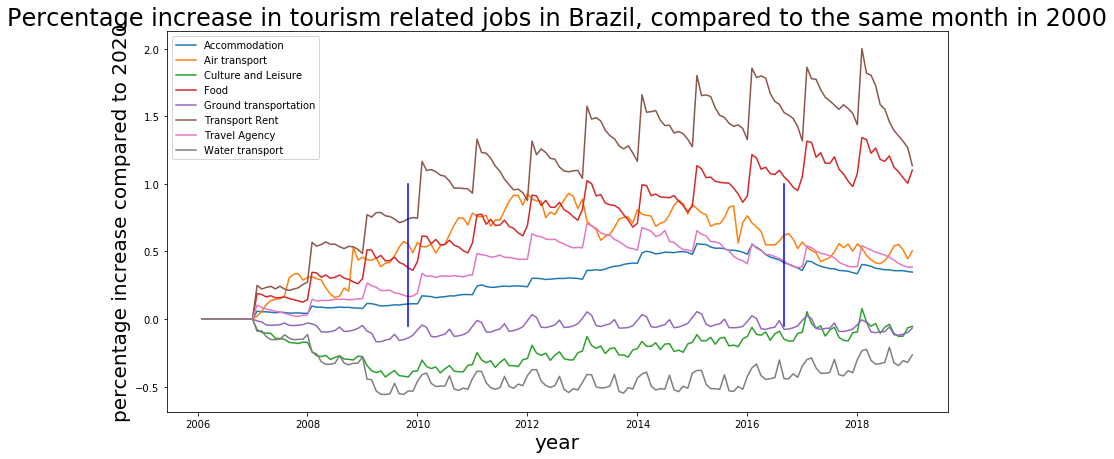

In [45]:

#all_tour_job(l1_2[l1_2.rio == 'Rio'],'Rio',(14,7))
#all_tour_job(l1_2[l1_2.rio == 'rio_region'],'Rio Region',(14,7))
#all_tour_job(l1_2[l1_2.rio == 'other'],'Other',(14,7))

lll = pd.DataFrame(l1_2.groupby(['year','month','job_type'])['jobs'].sum()).reset_index()
all_tour_job(lll,'Brazil',(14,7))
#all_tour_job2(lll,'Brazil',(14,7))

### Vancouver data
vancouver_tourism_indicators: real_GDP??? consumption_taxes可以用来看消费程度？有个employment by region

vancouver_employment_by_industry，region_codes： 如果有tourism相关region 考虑一下不？还是算了吧lol

vancouver_business_size，可以看出business 各个industry数量/员工数量。但unknown很烦不知道怎么处理

vancouver_visits：直观简洁只有year，month，count，做一下EDA

vancouver_room_revenues_2000_2010/2019 emmmm这两个还不太一样。。。




In [46]:
vancouver_files

['vancouver_turism_indicators',
 'vancouver_employment_by_industry',
 'vancouver_business_size',
 'vancouver_small_business_by_region',
 'vancouver_visits',
 'vancouver_room_revenues_2000_2010',
 'vancouver_room_revenues_2010_2019',
 'region_codes']

In [47]:
#vancouver datasets
for ind in range(len(vancouver_files)):
    l3 = pd.read_csv('{0}Vancouver/{1}.csv'.format(pathh,vancouver_files[ind]))
    print(ind,vancouver_files[ind])
    display(l3.head(3))

0 vancouver_turism_indicators


,year,revenue,GDP,real_GDP,implicit_price_index,employment,wages_and_salaries,consumption_taxes,employment_vcm,employment_vi,employment_to,employment_nbc,employment_bcr,employment_ccc
0,2000,"9,350","4,679","5,085",91.4,96.7,"2,801",855,"60,600","15,300","9,500","5,400","3,900","2,000"
1,2001,"9,448","4,857","5,102",94.6,104.2,"2,968",861,"67,300","15,700","9,300","5,400","4,500","2,100"
2,2002,"9,754","4,931","5,147",95.2,104.2,"2,927",943,"64,800","17,700","10,400","5,300","4,200","1,800"


1 vancouver_employment_by_industry


,year,industry_code,value
0,1987.0,0,1377700.0
1,1987.0,"11,21,22,23,31,32,33",333800.0
2,1987.0,"1100 1129, 1151 1152",31700.0


2 vancouver_business_size


,year,region_code,business_type,unknown,one_to_4,five_to_9,ten_to_19,twenty_to_49,fifty_to_199,two_hundred_plus
0,1999,DR01,"Agric., Forestry, Fishing & Hunt","1,227",954,219,142,99,44.0,7.0
1,1999,DR01,Mining & Oil & Gas Extract.,59,40,7,3,NaN,4.0,1.0
2,1999,DR01,Utilities,13,7,4,4,2,3.0,1.0


3 vancouver_small_business_by_region


,year,region_code,value
0,2007,DR01,"79,200"
1,2008,DR01,"80,300"
2,2009,DR01,"82,400"


4 vancouver_visits


,year,month,value
0,1994,1,320101
1,1994,2,315660
2,1994,3,429018


5 vancouver_room_revenues_2000_2010


,year,month,region_code,acc_type,revenue,properties,rooms
0,2000,1,DR01,TOT,7582000.0,345,"14,092"
1,2000,2,DR01,TOT,10090000.0,374,"14,335"
2,2000,3,DR01,TOT,13198000.0,401,"14,819"


6 vancouver_room_revenues_2010_2019


,year,month,region_code,region_name,revenue
0,2010.0,1.0,UC39,Campbell River,NaN
1,2010.0,2.0,UC39,Campbell River,NaN
2,2010.0,3.0,UC39,Campbell River,NaN


7 region_codes


,region_code,region_name,Composition,Description
0,DR01,Vancouver Island/Coast,"RD 17, 19, 21, 23, 25, 43, 45",NaN
1,DR02,Mainland/Southwest,"RD 09, 15, 29, 31",NaN
2,DR03,Thompson/Okanagan,"RD 07, 33, 35, 37, 39",NaN


In [48]:
l3_0 = pd.read_csv('{0}Vancouver/{1}.csv'.format(pathh,vancouver_files[0]))

## Tourism

具体方向：决定举办奥运会之前，决定举办和举办之间，举办之后（long run）
分地区涨势来比较

需要比较：人次，revenue的变化，其中revenue包括交通，酒店，景点需要人的收费，depend on data

方式：用linear regression/time series data method （ARIMA？）
重点是分different state 看这些数字的变化趋势，control一下看significance，注意有些相邻城市可能反而有negative的影响
control：月份/季节，查一下条例变化，like英国脱欧，经济形势

结论：maybe 人次，主要还是revenue在各个期间的变化，due to tourism

### break

Brazil没有钱数！ 感觉还是要develop some way to quantify the benefits brought by tourism? 
一个是量化，还有一个是数据可能会从各个industry的数据中来

然后我想一想怎么set up 方向吧。。。like the visible benefits, intended benefits? 比如要evaluate tourism在一个经济里的重要性？

### break

london那个是survey results 可能要问一下主办方关于sampling bias，Brazil没有钱数只有job和visits； vancouver有room revenue和也算有各个地区的数据吧，要确认一下第一个table和tourism究竟啥联系。。是总体的还是只关于tourism的。以及region解码应该还有别的可用的。

1. 主要还是 group by result，看能不能看出pattern，然后有的话就算一下significance，和别的国家/state比较；state如如果有区别就state比较；state比较勉强的话就找别的同类型国家的数据。

2. --》 根据月份，总体涨幅，每个state，每个间隔年是一个row，除去london/周边城市，fit一个regression？

3. 此外可能可以看看来自不同国家的tour增长，如果有pattern的话
如果有别的类似国家数据那么也可以一起lol
如果三个国家有similar pattern那就是了。

重点是看旅游业涨幅（人数job数whatever we have，conclusion on change） and whether it reflects on revenue,所以重点在前后的变化，来算净增长in comparison